# Spatial vectorization 

- raster to polygon
- raster to points
- raster to contours

>To polygon

In [24]:
import rasterio.features
import rasterio
import rasterio.plot
import shapely
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from helpers import src_grain

In [4]:
shapes = rasterio.features.shapes(rasterio.band(src_grain, 1))
shapes

<generator object shapes at 0x7f77b427c4f0>

>Returns a generator.

In [5]:
pol = list(shapes)
pol[0]

({'type': 'Polygon',
  'coordinates': [[(-1.5, 1.5),
    (-1.5, 1.0),
    (-1.0, 1.0),
    (-1.0, 1.5),
    (-1.5, 1.5)]]},
 1.0)

>Reshape to put into GeoDataFrame

In [8]:
geom = [shapely.geometry.shape(i[0]) for i in pol]
geom = gpd.GeoSeries(geom, crs=src_grain.crs)
geom

0     POLYGON ((-1.5 1.5, -1.5 1, -1 1, -1 1.5, -1.5...
1     POLYGON ((-1 1.5, -1 1, -0.5 1, -0.5 1.5, -1 1...
2     POLYGON ((-0.5 1.5, -0.5 1, 0 1, 0 1.5, -0.5 1...
3     POLYGON ((0 1.5, 0 1, 0.5 1, 0.5 0.5, 1 0.5, 1...
4           POLYGON ((1 1, 1 0.5, 1.5 0.5, 1.5 1, 1 1))
5     POLYGON ((-1 1, -1 0, 0 0, 0 0.5, -0.5 0.5, -0...
6     POLYGON ((-0.5 1, -0.5 0.5, 0 0.5, 0 0, 1 0, 1...
7         POLYGON ((1 0.5, 1 0, 1.5 0, 1.5 0.5, 1 0.5))
8     POLYGON ((-1.5 1, -1.5 -0.5, -0.5 -0.5, -0.5 0...
9     POLYGON ((-0.5 0, -0.5 -0.5, -1.5 -0.5, -1.5 -...
10    POLYGON ((-1.5 -1, -1.5 -1.5, -1 -1.5, -1 -1, ...
11    POLYGON ((0 -0.5, 0 -1, -0.5 -1, -0.5 -1.5, 0....
12    POLYGON ((0.5 -1, 0.5 -1.5, 1 -1.5, 1 -1, 0.5 ...
13     POLYGON ((1 -1, 1 -1.5, 1.5 -1.5, 1.5 -1, 1 -1))
dtype: geometry

In [11]:
values = [i[1] for i in pol]
values = pd.Series(values)
values

0     1.0
1     0.0
2     1.0
3     2.0
4     1.0
5     2.0
6     0.0
7     2.0
8     0.0
9     1.0
10    2.0
11    2.0
12    0.0
13    2.0
dtype: float64

In [12]:
result = gpd.GeoDataFrame({'value': values, 'geometry':geom})
result

,value,geometry
0,1.0,"POLYGON ((-1.5 1.5, -1.5 1, -1 1, -1 1.5, -1.5..."
1,0.0,"POLYGON ((-1 1.5, -1 1, -0.5 1, -0.5 1.5, -1 1..."
2,1.0,"POLYGON ((-0.5 1.5, -0.5 1, 0 1, 0 1.5, -0.5 1..."
3,2.0,"POLYGON ((0 1.5, 0 1, 0.5 1, 0.5 0.5, 1 0.5, 1..."
4,1.0,"POLYGON ((1 1, 1 0.5, 1.5 0.5, 1.5 1, 1 1))"
5,2.0,"POLYGON ((-1 1, -1 0, 0 0, 0 0.5, -0.5 0.5, -0..."
6,0.0,"POLYGON ((-0.5 1, -0.5 0.5, 0 0.5, 0 0, 1 0, 1..."
7,2.0,"POLYGON ((1 0.5, 1 0, 1.5 0, 1.5 0.5, 1 0.5))"
8,0.0,"POLYGON ((-1.5 1, -1.5 -0.5, -0.5 -0.5, -0.5 0..."
9,1.0,"POLYGON ((-0.5 0, -0.5 -0.5, -1.5 -0.5, -1.5 -..."


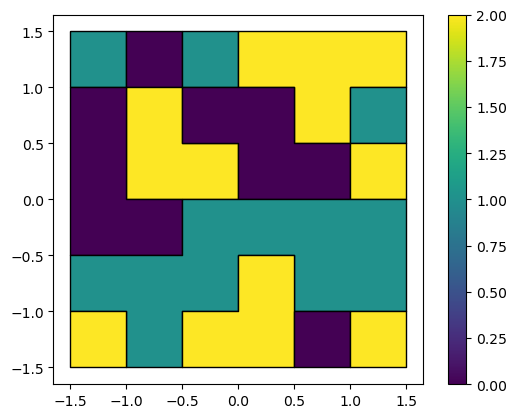

In [13]:
result.plot(column='value', ec='k', legend=True);

>Note that adjacent cells sharing raster values are dissolved into larger polygons

>To points

In [15]:
from helpers import src_elev as src

In [16]:
rasterio.transform.xy(src.transform, 0, 0)

(-1.25, 1.25)

In [19]:
height = src.shape[0]
width = src.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
rows, cols

(array([[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]]),
 array([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]))

In [20]:
x, y = rasterio.transform.xy(src.transform, rows, cols)
x, y

(array([-1.25, -0.75, -0.25,  0.25,  0.75,  1.25, -1.25, -0.75, -0.25,
         0.25,  0.75,  1.25, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,
        -1.25, -0.75, -0.25,  0.25,  0.75,  1.25, -1.25, -0.75, -0.25,
         0.25,  0.75,  1.25, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25]),
 array([ 1.25,  1.25,  1.25,  1.25,  1.25,  1.25,  0.75,  0.75,  0.75,
         0.75,  0.75,  0.75,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,
        -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.75, -0.75, -0.75,
        -0.75, -0.75, -0.75, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25]))

>Put into DataFrame

In [21]:
x = np.array(x).flatten()
y = np.array(y).flatten()
z = src.read(1).flatten()
geom = gpd.points_from_xy(x, y, crs=src.crs)
pnt = gpd.GeoDataFrame(data={'value': z}, geometry=geom)
pnt

,value,geometry
0,1,POINT (-1.25 1.25)
1,2,POINT (-0.75 1.25)
2,3,POINT (-0.25 1.25)
3,4,POINT (0.25 1.25)
4,5,POINT (0.75 1.25)
5,6,POINT (1.25 1.25)
6,7,POINT (-1.25 0.75)
7,8,POINT (-0.75 0.75)
8,9,POINT (-0.25 0.75)
9,10,POINT (0.25 0.75)


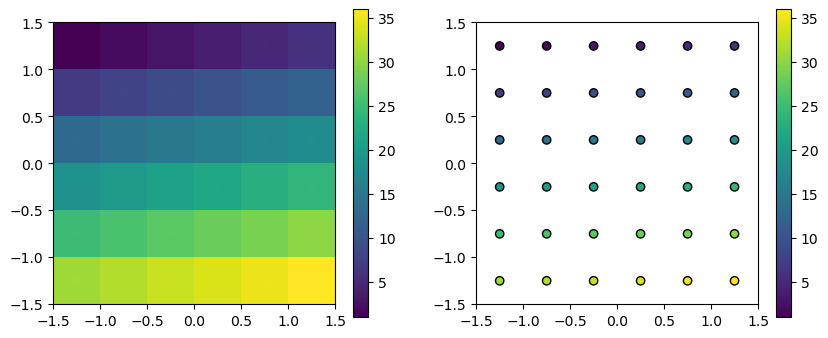

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
pnt.plot(column='value', legend=True, ax=ax[0])
rasterio.plot.show(src_elev, ax=ax[0])
pnt.plot(column='value', legend=True, ec='black', ax=ax[1])
rasterio.plot.show(src_elev, alpha=0, ax=ax[1]);

>To contours

In [28]:
from helpers import src_dem

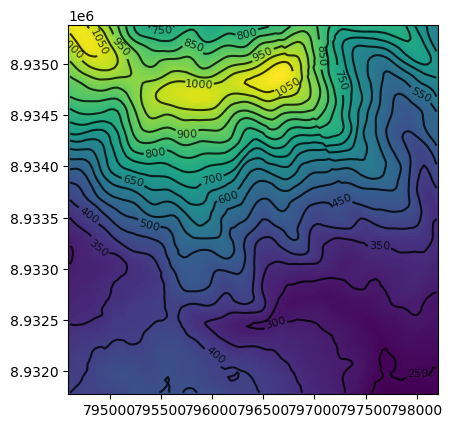

In [29]:
fig, ax = plt.subplots() 
rasterio.plot.show(src_dem, ax=ax)
rasterio.plot.show(
    src_dem, 
    ax=ax, 
    contour=True, 
    levels = np.arange(0, 1200, 50), 
    colors='black'
);

>Two ways to extract contour lines in vector form
>
>1. use `gdal_contour` through cli or `osgeo`
>2. custom function to export coordinates to `matplotlib` or `skimage`

In [30]:
import os

In [31]:
os.system('gdal_contour -a elev ../../data/dem.tif ../../output/dem_contour.gpkg -i 50.0')

0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [32]:
countours1 = gpd.read_file('../../output/dem_contour.gpkg')
countours1

,ID,elev,geometry
0,0,750.0,"LINESTRING (795382.355 8935384.325, 795382.355..."
1,1,800.0,"LINESTRING (795237.703 8935384.325, 795237.703..."
2,2,650.0,"LINESTRING (798098.379 8935384.325, 798098.379..."
3,3,850.0,"LINESTRING (795161.419 8935384.325, 795161.419..."
4,4,1050.0,"LINESTRING (794781.637 8935384.325, 794781.637..."
5,5,1000.0,"LINESTRING (794890.126 8935384.325, 794890.126..."
6,6,950.0,"LINESTRING (794995.621 8935384.325, 794995.621..."
7,7,1050.0,"LINESTRING (796640.349 8934751.9, 796619.783 8..."
8,8,1050.0,"LINESTRING (795910.233 8934690.2, 795910.233 8..."
9,9,1000.0,"LINESTRING (796013.066 8934566.8, 796002.783 8..."


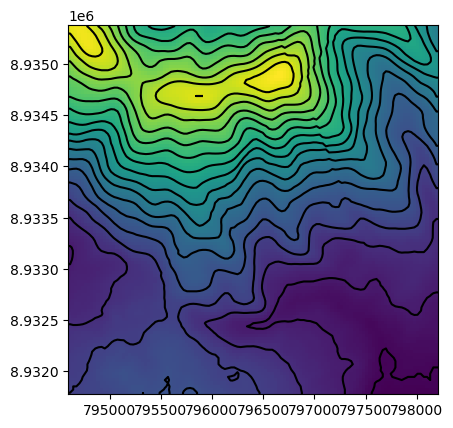

In [33]:
fig, ax = plt.subplots() 
rasterio.plot.show(src_dem, ax=ax)
countours1.plot(ax=ax, ec='k');